In [92]:
from dao.mongodbdao import MongoDBDao
from tfidf.TF_IDF import TF_IDF
import numpy as np 

dao = MongoDBDao({
    "host": "127.0.0.1",
    "db": "default",
    "wordindex_collection": "wordindex",
    "pagedetails_collection": "pagedetails",
    "username": "root",
    "password": "spezanw"
})

# Mindestähnlichkeit festlegen?

In [93]:
tfidf = TF_IDF(dao)

TF-IDF calculation: TF calculation: article with url {'https://www.berlin.de/polizei/polizeimeldungen/pressemitteilung.276386.php'} contains no words
TF-IDF calculation: TF calculation: article with url {'https://www.berlin.de/polizei/polizeimeldungen/pressemitteilung.461948.php'} contains no words
TF-IDF calculation: TF calculation: article with url {'https://www.berlin.de/polizei/polizeimeldungen/pressemitteilung.587702.php'} contains no words
TF-IDF calculation: TF calculation: article with url {'https://www.berlin.de/polizei/polizeimeldungen/pressemitteilung.85381.php'} contains no words


TF-IDF calculation: word in query {'drogen'} is not in db
TF-IDF calculation: word in query {'topf'} is not in db


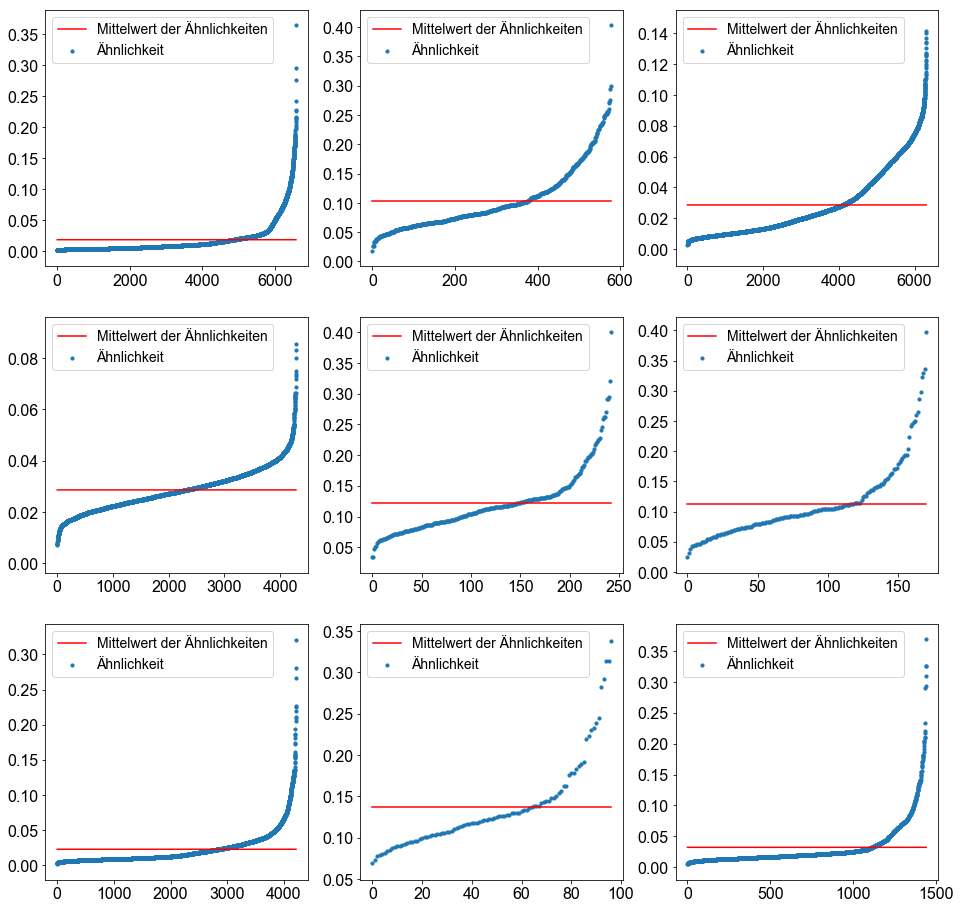

In [94]:
import matplotlib.pyplot as plt
import matplotlib as plt_

def calc_and_plot_mult(wordlist_list):
    n_cols = 3
    n_rows = int(np.ceil(len(wordlist_list)/n_cols))
    size=(16, (16/3)*n_rows)
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=size)
    axs_index = [0,0]
    
    for i, wordlist in enumerate(wordlist_list):
        res = tfidf.getResultsForInput(user_input=wordlist, return_sims=True)
        sims = [r[1] for r in res]
        sims_unique = np.unique(sims)
        
        x = [i for i, s in enumerate(sims_unique)]
        
        index = (axs_index[0], axs_index[1])
        
        #axs[index].set_xlabel("Dokument i") #str("... \nEingabewörter:" + str(wordlist)))
        #axs[index].set_ylabel("Ähnlichkeit(Eingabe, Dokument i)")
        
        axs[index].scatter(x, sims_unique, s=10)
        
        
        #draw a mean line for some exploration
        mean = np.mean(sims_unique)
        y = [mean for i, s in enumerate(sims_unique)]
        axs[index].plot(x, y, c='r')
        
        plt_.rcParams.update({'font.size': 14, 'font.family':'Arial'})
        axs[index].legend(["Mittelwert der Ähnlichkeiten", "Ähnlichkeit"])
        
        
        if axs_index[1] is n_cols-1:
            axs_index[0]=axs_index[0]+1
            axs_index[1]=0
        else:
            axs_index[1]=axs_index[1]+1

wl_l = [["fußgängerin", "gestern", "nachmittag", "polizei", "waffe", "drogen", "fahrrad"],
        ["fußgängerin", "fahrrad"],
        ["gestern", "nachmittag", "polizei"],
        ["gestern"],
        ["ampel"],
        ["schuss", "waffe"],
        ["beleidigung", "auto", "straße"],
        ["dieb", "topf"],
        ["diebstahl", "auto", "warschauer"],]
calc_and_plot_mult(wl_l)

In [95]:
u_input = ["fußgängerin", "gestern", "nachmittag", "polizei", "waffe", "drogen", "fahrrad"]
result = tfidf.getResultsForInput(user_input=u_input, 
                                  return_sims=True)

#for a given user input and url, calculates how many words from the query were the same as in the text (duplicates + different ones)
def same_words_amount(req_wordlist, url):
    db_wordlist = dao.getPageDetails(url)[0]["words"]
    db_wordlist_unique = np.unique(db_wordlist)
    db_wordlist_counts = np.unique(db_wordlist, return_counts=True)[1]
    db_wordlist_unique_counts = dict(zip(db_wordlist_unique, db_wordlist_counts))
    same=0
    for req_word in req_wordlist:
        try:
            same+=db_wordlist_unique_counts[req_word]
        except:
            pass
    return same

#returns for every similarity how many words from the query were the same as in the text (duplicates + different ones)
def sims_same_words_for_urls(req_wordlist, result):
    sims_same_words = []
    for url_sim in result:
        sim_same_words = (url_sim[1], same_words_amount(req_wordlist, url_sim[0]))
        sims_same_words.append(sim_same_words)
    return sims_same_words

sims_with_same_words = sims_same_words_for_urls(u_input,result)
sims = [item[0] for item in sims_with_same_words]
n_same_words = [item[1] for item in sims_with_same_words]

TF-IDF calculation: word in query {'drogen'} is not in db


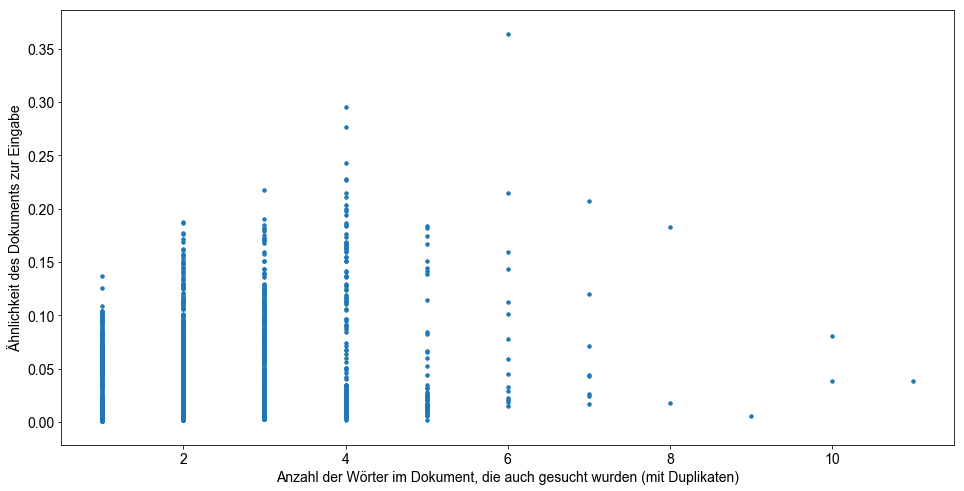

In [96]:
f, a = plt.subplots(figsize=(16, 8))
a.set_xlabel("Anzahl der Wörter im Dokument, die auch gesucht wurden (mit Duplikaten)")
a.set_ylabel("Ähnlichkeit des Dokuments zur Eingabe")
plt_.rcParams.update({'font.size': 16, 'font.family':'Arial'})
a.scatter(n_same_words, sims, s=12)